In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 3.0 MB/s eta 0:00:00


In [ ]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 16.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
import plotly.express as px
import emoji
import unicodedata
import re
from spellchecker import SpellChecker
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# EDA

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/1_DCD/M4_2Practica/tweet_emotions.csv")

In [ ]:
df.head(5)

,tweet_id,sentiment,content,clase
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,NaN
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,0.0
2,1956967696,sadness,Funeral ceremony...gloomy friday...,0.0
3,1956967789,enthusiasm,wants to hang out with friends SOON!,2.0
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,1.0


In [ ]:
def obtener_clase(descripcion):
    emociones = {
        'hate':     0,    # -5,
        'anger':    0,    # -4,
        'sadness':  0,    # -3,
        'worry':    1,    # -2,
        'boredom':  2,    # -1,
        'neutral':  2,    # 0,
        'empty':    2,    # 1,  eliminar registros
        'relief':   3,    # 2,
        'surprise': 3,    # 3,
        'fun':      3,    # 4,
        'enthusiasm': 3, # 5,
        'happiness': 4,  # 6,
        'love':      4    # 7
    }
    return emociones.get(descripcion.lower(), None)

# Aplicar la función a la columna 'descripcion' del DataFrame
df['clase'] = df['sentiment'].apply(obtener_clase)

In [ ]:
def obtener_clase(descripcion):
    emociones = {
        'hate':     0,    # -5,
        'anger':    0,    # -4,
        'sadness':  0,    # -3,
        'worry':    0,    # -2,
        'boredom':  1,    # -1,
        'neutral':  1,    # 0,
        'empty':    1,    # 1,  eliminar registros
        'relief':   1,    # 2,
        'surprise': 2,    # 3,
        'fun':      2,    # 4,
        'enthusiasm': 2, # 5,
        'happiness': 2,  # 6,
        'love':      2    # 7
    }
    return emociones.get(descripcion.lower(), None)

# Aplicar la función a la columna 'descripcion' del DataFrame
df['clase'] = df['sentiment'].apply(obtener_clase)

In [ ]:
df = df.drop(df[df['sentiment']=='empty'].index)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
 3   clase      40000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


In [ ]:
## eliminar tweets que solo sean de una palabra#################

df['num_palabras'] = df['content'].apply(lambda x: len(x.split()))

# Filtrar el DataFrame para mantener solo los textos que tienen más de dos palabras
df = df[df['num_palabras'] > 1]

# Eliminar la columna 'num_palabras', ya que ya no la necesitamos
df = df.drop(columns=['num_palabras'])

In [ ]:
def eliminar_urls(texto):
    return re.sub(r'http\S+', '', texto)

# Aplicar la función eliminar_urls a la columna 'texto' del DataFrame
df['content_clean'] = df['content'].apply(eliminar_urls)

In [ ]:
df['content_clean'] = df['content_clean'].str.replace(r'LOL', 'laughter', regex=True)
df['content_clean'] = df['content_clean'].str.replace(r'lol', 'laughter', regex=True)
df['content_clean'] = df['content_clean'].str.replace(r'\bha+h+a*\b', 'laughter', regex=True)


In [ ]:
# Reemplazar todas las "u" solitarias por "you"
df['content_clean'] = df['content_clean'].str.replace(r'\bu\b', 'you', regex=True)
df['content_clean'] = df['content_clean'].str.replace(r'\br\b', 'are', regex=True)


In [ ]:
import unicodedata
import re
import spacy
nlp = spacy.load("en_core_web_sm")
import emoji

# Obtener las stopwords para inglés de spacy
stopwords = spacy.lang.en.stop_words.STOP_WORDS

#eliminar menciones
def eliminar_menciones(texto, patron):
    return re.sub(patron, '', texto)



def clean_text(text, pattern="[^a-zA-Z0-9' ]"):
    cleaned_text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    cleaned_text = re.sub(pattern, " ", cleaned_text.decode("utf-8"), flags=re.UNICODE)
    doc = nlp(cleaned_text)    # Tokenizar el texto con spaCy
    cleaned_text = " ".join(token.text for token in doc if not token.is_stop)  # Eliminar las stop words con spacy
    #cleaned_text = u' '.join(cleaned_text.lower().split())
    cleaned_text = u' '.join(cleaned_text.lower().strip().split())

    return cleaned_text

In [ ]:
stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [ ]:
df['content_clean'] = df['content_clean'].apply(eliminar_menciones, patron=r'@[\w]+')

In [ ]:
df

,tweet_id,sentiment,content,clase,content_clean
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,0.0,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...,0.0,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!,3.0,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,2.0,We want to trade with someone who has Houston...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,1.0,Re-pinging : why didn't you go to prom? BC my ...
...,...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,2.0,
39996,1753919001,love,Happy Mothers Day All my love,4.0,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,4.0,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,4.0,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY ...


In [ ]:
df['content_clean'] = df['content_clean'].apply(clean_text)

In [ ]:
df.head(20)

,tweet_id,sentiment,content,clase,content_clean
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,0.0,layin n bed headache ughhhh waitin
2,1956967696,sadness,Funeral ceremony...gloomy friday...,0.0,funeral ceremony gloomy friday
3,1956967789,enthusiasm,wants to hang out with friends SOON!,3.0,wants hang friends soon
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,2.0,want trade houston tickets
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,1.0,pinging prom bc bf like friends
6,1956968487,sadness,"I should be sleep, but im not! thinking about ...",0.0,sleep m thinking old friend want married damn ...
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down,1.0,hmmm
8,1956969035,sadness,@charviray Charlene my love. I miss you,0.0,charlene love miss
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?,0.0,sorry friday
10,1956969456,neutral,cant fall asleep,2.0,nt fall asleep


In [ ]:
df['content_clean'] = df['content_clean'].str.replace(r'\bgf\b', 'girlfriend', regex=True)
df['content_clean'] = df['content_clean'].str.replace(r'\bbf\b', 'boyfriend', regex=True)
df['content_clean'] = df['content_clean'].str.replace(r'\bbc\b', 'because', regex=True)
df['content_clean'] = df['content_clean'].str.replace(r'\bbff\b', 'best friends forever', regex=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39027 entries, 1 to 39999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       39027 non-null  int64  
 1   sentiment      39027 non-null  object 
 2   content        39027 non-null  object 
 3   clase          39027 non-null  float64
 4   content_clean  39027 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.8+ MB


In [ ]:
# Limpiar los espacios en blanco en la columna
df['content_clean'] = df['content_clean'].str.replace(r'\s+', ' ', regex=True)

In [ ]:
df['clase'].value_counts(1) #clases desbalanceadas

0    0.376425
2    0.344325
1    0.279250
Name: clase, dtype: float64

In [ ]:
pip install stylecloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/262.1 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.4/161.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 394.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259494 sha256=5a8974f947a89cdb056652ef14555d68ed681b304156c828ef9025145999982b
  Stored in directory: /root/.cache/pip/wheels/aa/c8/27/9374f4fc7133015d902b5e2c75ad951edd57eb1ae948495915
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=74256e93cf04e1656fe9871437120a4f454c3317a94bb95c8a4be8f8db153762
  Stored in directory: /root/.cache/pip/wheels/d6/6d

In [ ]:
import stylecloud

text = ' '.join(df['content_clean'])

# Generar la nube de palabras con stylecloud
stylecloud.gen_stylecloud(text=text,
                          palette='matplotlib.Viridis_10',  # Selecciona una paleta de colores
                          icon_name='fas fa-cloud',  # Icono de la nube de palabras
                          size=1024,  # Tamaño de la imagen en píxeles
                          output_name='wordcloud_clean.png'  # Nombre del archivo de salida
                          )

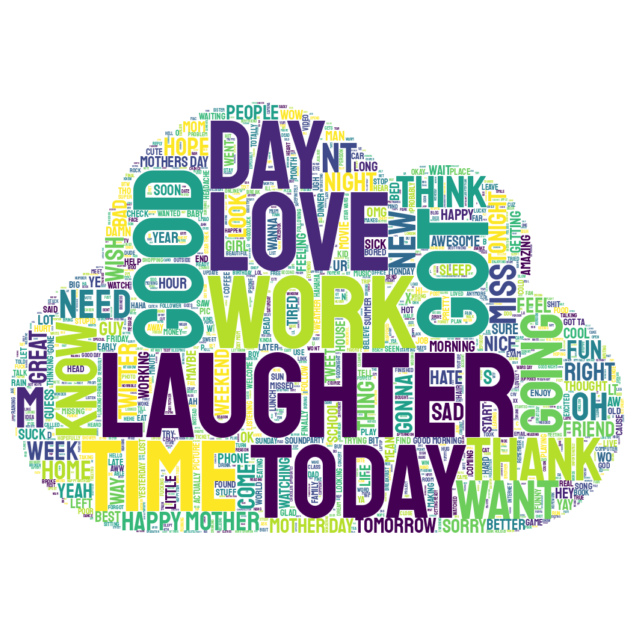

In [ ]:
from PIL import Image

# Cargar la imagen de la nube de palabras generada
wordcloud_image = Image.open('wordcloud_clean.png')

# Mostrar la imagen con matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis('off')  # Oculta los ejes
plt.show()


In [ ]:
df['content_clean'] = df['content_clean'].str.replace('quot', '')

In [ ]:
df['content_clean'] = df['content_clean'].str.replace('amp', '')

In [ ]:
def reemplazar_letras_repetidas(texto):
    return re.sub(r'(.)\1{2,}', r'\1', texto)

# Aplicar la función reemplazar_letras_repetidas a la columna 'texto' del DataFrame
df['content_clean'] = df['content_clean'].apply(reemplazar_letras_repetidas)

In [ ]:
# de palabras por oracion
df2=df.copy()
df2['num_palabras']=df2['content'].map(lambda x: len(x.split()))
num_palabras=df2.groupby(['sentiment','num_palabras'])['tweet_id'].count().reset_index()

In [ ]:
#num_palabras['content'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9])

In [ ]:
fig = px.histogram(num_palabras, x="num_palabras", y="tweet_id",color='sentiment')
fig.show()

In [ ]:
#longitud de la oración
df2['longitud']=df2['content'].map(lambda x: len(x))

In [ ]:
longitud=df2.groupby(['sentiment','longitud'])['tweet_id'].count().reset_index()
fig = px.histogram(longitud, x="longitud", y="tweet_id",color='sentiment')
fig.show()

In [ ]:
df["len_text_raw"] = df["content"].str.len()
df["n_lower_ratio_len"] = df["content"].map(lambda x:sum(map(str.islower, x))) / df["len_text_raw"]
df["n_upper_ratio_len"] = df["content"].map(lambda x:sum(map(str.isupper, x))) / df["len_text_raw"]
df["n_words"] = df["content"].str.split(" ").str.len()
df["n_letters"] = df["content"].map(lambda x:sum(map(str.isalpha, x)))
df["n_lower_ratio_letters"] = df["content"].map(lambda x:sum(map(str.islower, x))) / df["n_letters"]
df["n_upper_ratio_letters"] = df["content"].map(lambda x:sum(map(str.isupper, x))) / df["n_letters"]

In [ ]:
#faltas de ortografia
#spell = SpellChecker()

#def verificar_ortografia(texto):
#    palabras = texto.split()
#    contador = 0
#    for palabra in palabras:
#        if palabra.lower() not in spell:
#            contador += 1
#    return contador

In [ ]:
#sin emojis
#df2["n_emojis"] = df2["content"].map(emoji.emoji_count)
#df2['n_emojis'].value_counts()

In [ ]:
#quitamos Stop words antes de hacer nueve de palabras
stop_words = set(stopwords.words('english'))
stop_words.update(['im',"I'm"])

In [ ]:
text = " ".join(review for review in df["content_clean"])

#mask = np.array(Image.open("/content/nube.png"))
#mask[mask == 1] = 255

wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'stop_words' is not defined

# Preprocesamiento

In [ ]:
def clean_text(text, pattern="[^a-zA-Z0-9 ]"):
    cleaned_text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    cleaned_text = re.sub(pattern, " ", cleaned_text.decode("utf-8"), flags=re.UNICODE)
    cleaned_text = u' '.join(cleaned_text.lower().strip().split())
    return cleaned_text

In [ ]:
#def transformaciones(df,texto):
#  df[texto]=df[texto].map(lambda x: clean_text(x))
#  df[texto]=df[texto].str.lower() # minusculas
#  df[texto]=df[texto].map(lambda text:" ".join([x for x in text.split(" ") if x not in stop_words]))
#  corpus=" ".join(df[texto].values)
#  fdist=nltk.FreqDist(corpus.split())
#  list_hapaxes=fdist.hapaxes()
#  df[texto]=df[texto].map(lambda text:" ".join([x for x in text.split(" ") if x not in list_hapaxes]))
#  lemmatizer = WordNetLemmatizer()
#  df[texto] = df[texto].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))


In [ ]:
df['content']=df['content'].map(lambda x: clean_text(x)) #unicode

In [ ]:
df['content']=df['content'].str.lower() # minusculas
df["content"]=df["content"].map(lambda text:" ".join([x for x in text.split(" ") if x not in stop_words]))#STOPWORDS

In [ ]:
#HAPAXES
corpus=" ".join(df["content_clean"].values)
fdist=nltk.FreqDist(corpus.split())
list_hapaxes=fdist.hapaxes()

In [ ]:
len(list_hapaxes) #32,712

16946

In [ ]:
list_hapaxes

['charlene',
 'tourture',
 'itonlinelaughter',
 'leaking',
 'signals',
 'plotting',
 'muahahaha',
 'balisage',
 'markup',
 'topicmaps',
 'keggers',
 'lewd',
 'koxpers',
 "bs'd",
 'contractions',
 'skott',
 'uds',
 'wnna',
 '6hrs',
 'restructuring',
 'dibs',
 'sulu',
 'onward',
 'aby',
 'yaris',
 '70mpg',
 'pumkpin',
 'nudges',
 'sexual',
 'maternal',
 "'threatening'",
 "'him'",
 'plurking',
 'bacterin',
 'voobys',
 'elp',
 'ae',
 "knight's",
 'definitly',
 "'it'sakey'",
 'blaahh',
 'spellchecker',
 'unhelpful',
 'availble',
 'plucked',
 'cayogial',
 'rakeem',
 'bbye',
 'biochem',
 'misshu',
 'retry',
 'tasteless',
 'portion',
 'youstinkatrespondingtotexts',
 'cheesesteak',
 '626',
 'twiddling',
 "16'th",
 'achieving',
 'cumbersome',
 'neemah',
 'airmatras',
 'wellness',
 'insuran',
 'meanw',
 'bestfriends',
 '400mb',
 'onpeak',
 'memo',
 'yearling',
 'splinter',
 'muppets',
 'displeased',
 'thanksgiving',
 'tangled',
 'dislocation',
 'fracture',
 'resulted',
 'torchwood',
 'weeknend',


In [ ]:
df["content_clean"]=df["content_clean"].map(lambda text:" ".join([x for x in text.split(" ") if x not in list_hapaxes]))

In [ ]:
#lematizacion
lemmatizer = WordNetLemmatizer()
df['content'] = df['content'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))


In [ ]:
df.to_csv('/content/drive/MyDrive/1_DCD/M4_2Practica/df_twitter_limpio_conhapaxes.csv')

In [ ]:
from sklearn.model_selection import (train_test_split, RepeatedKFold, RepeatedStratifiedKFold,
                                     cross_validate, cross_val_score, KFold)
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [ ]:
#división train y test
#X=df['content']
y=df['clase']

In [ ]:
y[0]

array([0., 1., 0.], dtype=float32)

In [ ]:
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y)
y= to_categorical(y)

In [ ]:
#y_train.value_counts(1)
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts(X_train)
#word_index = tokenizer.word_index

In [ ]:
#tokenizacion
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['content_clean'])
word_index = tokenizer.word_index

In [ ]:
#unique_word=len(word_index)
tokenized_reviews = tokenizer.texts_to_sequences(df['content_clean'])

In [ ]:
max_length = max([len(x) for x in tokenized_reviews])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tokenized_reviews, y,stratify=y,train_size=.8, random_state=1208)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Embedding, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
X_train_padded = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test, maxlen=max_length, padding='post')

Embedding

In [ ]:
from keras.optimizers import Adam

In [ ]:
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
embedding_matrix = gensim.downloader.load('glove-twitter-200')

[==================================================] 100.0% 758.5/758.5MB downloaded


In [ ]:
embedding_vectors = embedding_matrix.vectors

In [ ]:
embedding_vectors

array([[ 3.1553e-01,  5.3765e-01,  1.0177e-01, ..., -4.5664e-01,
        -4.6540e-01,  5.2066e-01],
       [ 3.5132e-01,  5.6084e-04, -2.1488e-01, ...,  3.6684e-02,
        -3.7206e-02,  8.5384e-01],
       [ 8.0767e-01,  4.9786e-01,  8.2696e-02, ..., -7.3302e-02,
        -4.7785e-01,  6.7059e-01],
       ...,
       [ 4.6298e-01,  1.0477e-01,  2.3461e-01, ..., -4.2007e-01,
        -3.2021e-01, -5.3523e-01],
       [ 5.9501e-01, -2.1580e-01,  2.9049e-01, ...,  2.2362e-01,
         1.2880e-01, -3.8757e-02],
       [-5.9487e-01, -1.9176e-01,  3.7470e-01, ..., -1.4474e-01,
        -1.9884e-01, -9.2338e-01]], dtype=float32)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE()
embed_tsne = tsne.fit_transform(embedding_vectors)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

fig, ax = plt.subplots(figsize=(16, 16))
for idx, word in enumerate((list(gensim.wv.key_to_index.keys())[:200])):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(word, (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)

plt.grid()

In [ ]:
unique_word= len(embedding_matrix.key_to_index)

In [ ]:
unique_word

1193514

In [ ]:
embedding_layer = Embedding(input_dim=unique_word, output_dim=200, weights=[embedding_vectors], input_length=max_length, trainable=False)

In [ ]:
from tensorflow.keras.layers import SimpleRNN

In [ ]:
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense, Concatenate

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
model_rnn = Sequential()
model_rnn.add(embedding_layer)
model_rnn.add(SimpleRNN(units=200))
model_rnn.add(Dense(3, activation='softmax'))

model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
model_rnn.fit(X_train_padded, y_train, epochs=100,validation_data=(X_test_padded, y_test),callbacks=[early_stop])
#model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_val, y_cat_val), callbacks=[early_stop])

Epoch 1/100
1000/1000 [==============================] - 30s 26ms/step - loss: 1.1112 - accuracy: 0.3589 - val_loss: 1.0917 - val_accuracy: 0.3764
Epoch 2/100
1000/1000 [==============================] - 23s 23ms/step - loss: 1.1010 - accuracy: 0.3577 - val_loss: 1.0947 - val_accuracy: 0.3444
Epoch 3/100
1000/1000 [==============================] - 23s 23ms/step - loss: 1.1007 - accuracy: 0.3606 - val_loss: 1.0987 - val_accuracy: 0.3444
Epoch 4/100
1000/1000 [==============================] - 27s 27ms/step - loss: 1.1015 - accuracy: 0.3583 - val_loss: 1.0965 - val_accuracy: 0.3764
Epoch 5/100
1000/1000 [==============================] - 25s 25ms/step - loss: 1.1030 - accuracy: 0.3602 - val_loss: 1.1059 - val_accuracy: 0.3764
Epoch 6/100
1000/1000 [==============================] - 24s 24ms/step - loss: 1.0996 - accuracy: 0.3615 - val_loss: 1.0950 - val_accuracy: 0.3765


In [ ]:
model_rnn = Sequential()
model_rnn.add(embedding_layer)
model_rnn.add(SimpleRNN(units=128, return_sequences=True))
model_rnn.add(SimpleRNN(units=50))
model_rnn.add(Dense(3, activation='softmax'))

#'adam' 25-26
model_rnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_rnn.fit(X_train_padded, y_train, epochs=100,validation_data=(X_test_padded, y_test),callbacks=[early_stop])

Epoch 1/100
1000/1000 [==============================] - 29s 26ms/step - loss: 1.0963 - accuracy: 0.3657 - val_loss: 1.0932 - val_accuracy: 0.3764
Epoch 2/100
1000/1000 [==============================] - 26s 26ms/step - loss: 1.0945 - accuracy: 0.3667 - val_loss: 1.0926 - val_accuracy: 0.3444
Epoch 3/100
1000/1000 [==============================] - 29s 29ms/step - loss: 1.0947 - accuracy: 0.3681 - val_loss: 1.0942 - val_accuracy: 0.3764
Epoch 4/100
1000/1000 [==============================] - 25s 25ms/step - loss: 1.0936 - accuracy: 0.3703 - val_loss: 1.1031 - val_accuracy: 0.3444
Epoch 5/100
1000/1000 [==============================] - 24s 24ms/step - loss: 1.0938 - accuracy: 0.3693 - val_loss: 1.0981 - val_accuracy: 0.3764
Epoch 6/100
1000/1000 [==============================] - 25s 25ms/step - loss: 1.0944 - accuracy: 0.3710 - val_loss: 1.0920 - val_accuracy: 0.3764
Epoch 7/100
1000/1000 [==============================] - 25s 25ms/step - loss: 1.0939 - accuracy: 0.3698 - val_loss: 1

GRU

In [ ]:
from tensorflow.keras.layers import GRU
from keras.layers import Dropout

In [ ]:
model_gru = Sequential()
model_gru.add(embedding_layer)
model_gru.add(GRU(units=50,return_sequences=True))
model_gru.add(Dropout(0.30))
model_gru.add(GRU(units=50,return_sequences=True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(units=25))
model_gru.add(Dense(3, activation='softmax'))
#44-34
#46-34
model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_gru.fit(X_train_padded, y_train, epochs=100,validation_data=(X_test_padded, y_test),callbacks=[early_stop])

Epoch 1/100
1000/1000 [==============================] - 55s 49ms/step - loss: 1.0617 - accuracy: 0.4288 - val_loss: 1.0078 - val_accuracy: 0.5058
Epoch 2/100
1000/1000 [==============================] - 44s 44ms/step - loss: 0.9818 - accuracy: 0.5245 - val_loss: 0.9672 - val_accuracy: 0.5364
Epoch 3/100
1000/1000 [==============================] - 45s 45ms/step - loss: 0.9401 - accuracy: 0.5597 - val_loss: 0.9681 - val_accuracy: 0.5401
Epoch 4/100
1000/1000 [==============================] - 47s 47ms/step - loss: 0.9061 - accuracy: 0.5798 - val_loss: 0.9738 - val_accuracy: 0.5322
Epoch 5/100
1000/1000 [==============================] - 44s 44ms/step - loss: 0.8688 - accuracy: 0.6086 - val_loss: 0.9719 - val_accuracy: 0.5391
Epoch 6/100
1000/1000 [==============================] - 47s 47ms/step - loss: 0.8312 - accuracy: 0.6334 - val_loss: 1.0027 - val_accuracy: 0.5269
Epoch 7/100
1000/1000 [==============================] - 47s 47ms/step - loss: 0.7930 - accuracy: 0.6590 - val_loss: 1

In [ ]:
model_gru2 = Sequential()
model_gru2.add(embedding_layer)
model_gru2.add(GRU(units=128,return_sequences=True))
model_gru2.add(Dropout(0.30))
model_gru2.add(GRU(units=64,return_sequences=True))
model_gru2.add(Dropout(0.25))
model_gru2.add(GRU(units=32))
model_gru2.add(Dense(16, activation='relu'))
model_gru2.add(Dropout(0.25))
model_gru2.add(Dense(5, activation='softmax'))
#45-35
model_gru2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_gru2.fit(X_train_padded, y_train, epochs=100,validation_data=(X_test_padded, y_test),callbacks=[early_stop])

Epoch 1/100
1000/1000 [==============================] - 101s 89ms/step - loss: 1.0904 - accuracy: 0.3733 - val_loss: 1.0852 - val_accuracy: 0.3969
Epoch 2/100
1000/1000 [==============================] - 86s 86ms/step - loss: 1.0514 - accuracy: 0.4420 - val_loss: 1.0070 - val_accuracy: 0.4820
Epoch 3/100
1000/1000 [==============================] - 87s 87ms/step - loss: 0.9971 - accuracy: 0.4997 - val_loss: 0.9820 - val_accuracy: 0.5159
Epoch 4/100
1000/1000 [==============================] - 88s 88ms/step - loss: 0.9600 - accuracy: 0.5427 - val_loss: 0.9830 - val_accuracy: 0.5090
Epoch 5/100
1000/1000 [==============================] - 82s 82ms/step - loss: 0.9216 - accuracy: 0.5743 - val_loss: 0.9839 - val_accuracy: 0.5329
Epoch 6/100
1000/1000 [==============================] - 88s 88ms/step - loss: 0.8709 - accuracy: 0.6058 - val_loss: 1.0203 - val_accuracy: 0.5280
Epoch 7/100
1000/1000 [==============================] - 87s 87ms/step - loss: 0.8108 - accuracy: 0.6457 - val_loss: 

LSTM

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
model_lstm = Sequential()
model_lstm.add(embedding_layer)
model_lstm.add(LSTM(units=200,return_sequences=True))
model_lstm.add(LSTM(units=100,return_sequences=True))
model_lstm.add(Dropout(0.25))
model_lstm.add(LSTM(units=50,return_sequences=True))
model_lstm.add(Dropout(0.25))
model_lstm.add(LSTM(units=25))
model_lstm.add(Dropout(0.25))
model_lstm.add(Dense(50, activation='softmax'))
model_lstm.add(Dense(3, activation='softmax'))
#44-32
#45-35
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_lstm.fit(X_train_padded, y_train, epochs=100,validation_data=(X_test_padded, y_test),callbacks=[early_stop])

Epoch 1/100
1000/1000 [==============================] - 187s 173ms/step - loss: 1.0918 - accuracy: 0.3758 - val_loss: 1.0913 - val_accuracy: 0.3764
Epoch 2/100
1000/1000 [==============================] - 164s 164ms/step - loss: 1.0914 - accuracy: 0.3748 - val_loss: 1.0912 - val_accuracy: 0.3764
Epoch 3/100
1000/1000 [==============================] - 170s 170ms/step - loss: 1.0913 - accuracy: 0.3764 - val_loss: 1.0911 - val_accuracy: 0.3764
Epoch 4/100
1000/1000 [==============================] - 169s 169ms/step - loss: 1.0913 - accuracy: 0.3764 - val_loss: 1.0912 - val_accuracy: 0.3764
Epoch 5/100
1000/1000 [==============================] - 169s 169ms/step - loss: 1.0913 - accuracy: 0.3760 - val_loss: 1.0911 - val_accuracy: 0.3764
Epoch 6/100
1000/1000 [==============================] - 166s 166ms/step - loss: 1.0913 - accuracy: 0.3764 - val_loss: 1.0912 - val_accuracy: 0.3764
Epoch 7/100
1000/1000 [==============================] - 173s 173ms/step - loss: 1.0913 - accuracy: 0.3764

In [ ]:
model_lstm2 = Sequential()
model_lstm2.add(embedding_layer)
model_lstm2.add(LSTM(units=128,return_sequences=True))
model_lstm2.add(Dropout(0.20))
model_lstm2.add(LSTM(units=64))
model_lstm2.add(Dropout(0.20))
model_lstm2.add(Dense(32, activation='sigmoid'))
model_lstm2.add(Dense(16, activation='relu'))
model_lstm2.add(Dense(8, activation='tanh'))
model_lstm2.add(Dropout(0.50))
model_lstm2.add(Dense(3, activation='softmax'))
# 51-32
model_lstm2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_lstm2.fit(X_train_padded, y_train, epochs=100,validation_data=(X_test_padded, y_test),callbacks=[early_stop])

Epoch 1/100
1000/1000 [==============================] - 92s 88ms/step - loss: 1.0928 - accuracy: 0.3742 - val_loss: 1.0914 - val_accuracy: 0.3764
Epoch 2/100
1000/1000 [==============================] - 84s 84ms/step - loss: 1.0918 - accuracy: 0.3754 - val_loss: 1.0912 - val_accuracy: 0.3764
Epoch 3/100
1000/1000 [==============================] - 87s 87ms/step - loss: 1.0913 - accuracy: 0.3760 - val_loss: 1.0912 - val_accuracy: 0.3764
Epoch 4/100
1000/1000 [==============================] - 89s 89ms/step - loss: 1.0914 - accuracy: 0.3764 - val_loss: 1.0912 - val_accuracy: 0.3764
Epoch 5/100
1000/1000 [==============================] - 86s 86ms/step - loss: 1.0912 - accuracy: 0.3764 - val_loss: 1.0912 - val_accuracy: 0.3764
Epoch 6/100
1000/1000 [==============================] - 90s 90ms/step - loss: 1.0913 - accuracy: 0.3760 - val_loss: 1.0911 - val_accuracy: 0.3764
Epoch 7/100
1000/1000 [==============================] - 87s 87ms/step - loss: 1.0913 - accuracy: 0.3760 - val_loss: 1

AGREGANDO VARIABLES NUMERICAS

In [ ]:
X_numeric = df[["len_text_raw", "n_lower_ratio_len", "n_upper_ratio_len", "n_words", "n_letters", "n_lower_ratio_letters", "n_upper_ratio_letters"]]


In [ ]:
X_text_train, X_text_test, X_numeric_train, X_numeric_test, y_train, y_test = train_test_split(tokenized_reviews, X_numeric, y, stratify=y,test_size=0.7, random_state=1208)


In [ ]:
X_train_padded = pad_sequences(X_text_train, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_text_test, maxlen=max_length, padding='post')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_numeric_train_scaled = scaler.fit_transform(X_numeric_train)
X_numeric_test_scaled = scaler.transform(X_numeric_test)

In [ ]:
from keras.layers import Input, Embedding, SimpleRNN, Dense, concatenate
from keras.models import Model

In [ ]:


X_train_combined = [X_train_padded, X_numeric_train_scaled]
X_test_combined = [X_test_padded, X_numeric_test_scaled]

numeric_input = Input(shape=(7,))


text_input = Input(shape=(max_length,))

embedding_layer = Embedding(input_dim=unique_word, output_dim=100, weights=[embedding_vectors], input_length=max_length, trainable=False)(text_input)
#embedding_layer = Embedding(input_dim=unique_word, output_dim=100, weights=[embedding_vectors], input_length=max_length, trainable=False)
rnn_output = SimpleRNN(units=100)(embedding_layer)
concatenated = concatenate([rnn_output, numeric_input])
output = Dense(13, activation='softmax')(concatenated)
model = Model(inputs=[text_input, numeric_input], outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_combined, y_train, validation_data=(X_test_combined, y_test), epochs=50, callbacks=[early_stop])


Epoch 1/50
375/375 [==============================] - 11s 26ms/step - loss: nan - accuracy: 0.0084 - val_loss: nan - val_accuracy: 0.0027
Epoch 2/50
375/375 [==============================] - 8s 21ms/step - loss: nan - accuracy: 0.0027 - val_loss: nan - val_accuracy: 0.0027
Epoch 3/50
375/375 [==============================] - 7s 17ms/step - loss: nan - accuracy: 0.0027 - val_loss: nan - val_accuracy: 0.0027
Epoch 4/50
375/375 [==============================] - 7s 19ms/step - loss: nan - accuracy: 0.0027 - val_loss: nan - val_accuracy: 0.0027
Epoch 5/50
375/375 [==============================] - 8s 22ms/step - loss: nan - accuracy: 0.0027 - val_loss: nan - val_accuracy: 0.0027


In [ ]:
model_lstm.fit(X_train_padded, y_train, epochs=100,validation_data=(X_test_padded, y_test),callbacks=[early_stop])